In [1]:
from PIL import Image
import os
import glob
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import splitfolders
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, pooling
from keras.utils import np_utils, to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
import splitfolders
import random

In [4]:
categories = [("PET", 1), ("PS", 2), ("PP", 3), ("PE", 4)] # 2992 / 2992 / 3001 / 2776 = > 11,761

X, y = [], []

In [3]:
# splitfolders.ratio("input", output="output", seed=1337, ratio=(0.8, 0.2))

Copying files: 11761 files [00:38, 302.03 files/s]


In [4]:
for i, v in enumerate(categories) : 
    # one-hot encoding
    label = [0 for _ in range(len(categories))]
    label[i] = 1

    image_dir = "./output/train/" + v[0] + "_IMG/*.jpg"
    files = glob.glob(image_dir)
    for file in files :
        image = Image.open(file)
        image = image.convert("RGB")
        image = image.resize((64, 64))
        data = np.asarray(image)
        
#         label = [0 for _ in range(len(categories))]
#         json_file = file.replace(".jpg", ".txt")
#         json_txt = open(json_file, 'r', encoding = 'utf8')
#         category_id = int(json_txt.readline().rstrip().split(" : ")[1])
#         label[category_id - 1] = 1

        X.append(data)
        y.append(label)

In [5]:
X = np.array(X)
y = np.array(y)

print(len(X))
print(len(y))

10582
10582


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=219)
xy = (X_train, X_test, y_train, y_test)
np.save("./muli_image_data_cnn.npy", xy)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [7]:
# 일반화
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
# 모형 구조 정의하기
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(pooling.MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(pooling.MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(categories), activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0

In [12]:
# 모형 학습 정의하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 저장
model_path = "./multi_img_classification_cnn.model"
checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)

In [13]:
# 학습하기
history=model.fit(X_train, y_train, validation_split=0.3, batch_size=32, epochs=10, verbose=1, callbacks=[checkpoint])

Epoch 1/10
186/186 [==============================] - ETA: 0s - loss: 0.6806 - accuracy: 0.7219
Epoch 1: saving model to .\multi_img_classification_cnn.model


INFO:tensorflow:Assets written to: .\multi_img_classification_cnn.model\assets


INFO:tensorflow:Assets written to: .\multi_img_classification_cnn.model\assets


186/186 [==============================] - 86s 445ms/step - loss: 0.6806 - accuracy: 0.7219 - val_loss: 0.2735 - val_accuracy: 0.9142
Epoch 2/10
186/186 [==============================] - ETA: 0s - loss: 0.2112 - accuracy: 0.9269
Epoch 2: saving model to .\multi_img_classification_cnn.model


INFO:tensorflow:Assets written to: .\multi_img_classification_cnn.model\assets


INFO:tensorflow:Assets written to: .\multi_img_classification_cnn.model\assets


186/186 [==============================] - 73s 394ms/step - loss: 0.2112 - accuracy: 0.9269 - val_loss: 0.1820 - val_accuracy: 0.9374
Epoch 3/10
186/186 [==============================] - ETA: 0s - loss: 0.1550 - accuracy: 0.9487
Epoch 3: saving model to .\multi_img_classification_cnn.model


INFO:tensorflow:Assets written to: .\multi_img_classification_cnn.model\assets


INFO:tensorflow:Assets written to: .\multi_img_classification_cnn.model\assets


186/186 [==============================] - 63s 339ms/step - loss: 0.1550 - accuracy: 0.9487 - val_loss: 0.1268 - val_accuracy: 0.9528
Epoch 4/10
186/186 [==============================] - ETA: 0s - loss: 0.1035 - accuracy: 0.9673
Epoch 4: saving model to .\multi_img_classification_cnn.model


INFO:tensorflow:Assets written to: .\multi_img_classification_cnn.model\assets


INFO:tensorflow:Assets written to: .\multi_img_classification_cnn.model\assets


186/186 [==============================] - 69s 373ms/step - loss: 0.1035 - accuracy: 0.9673 - val_loss: 0.0981 - val_accuracy: 0.9665
Epoch 5/10
186/186 [==============================] - ETA: 0s - loss: 0.0939 - accuracy: 0.9693
Epoch 5: saving model to .\multi_img_classification_cnn.model


INFO:tensorflow:Assets written to: .\multi_img_classification_cnn.model\assets


INFO:tensorflow:Assets written to: .\multi_img_classification_cnn.model\assets


186/186 [==============================] - 68s 366ms/step - loss: 0.0939 - accuracy: 0.9693 - val_loss: 0.0966 - val_accuracy: 0.9697
Epoch 6/10
186/186 [==============================] - ETA: 0s - loss: 0.0732 - accuracy: 0.9752
Epoch 6: saving model to .\multi_img_classification_cnn.model


INFO:tensorflow:Assets written to: .\multi_img_classification_cnn.model\assets


INFO:tensorflow:Assets written to: .\multi_img_classification_cnn.model\assets


186/186 [==============================] - 72s 389ms/step - loss: 0.0732 - accuracy: 0.9752 - val_loss: 0.0638 - val_accuracy: 0.9791
Epoch 7/10
186/186 [==============================] - ETA: 0s - loss: 0.0625 - accuracy: 0.9782
Epoch 7: saving model to .\multi_img_classification_cnn.model


INFO:tensorflow:Assets written to: .\multi_img_classification_cnn.model\assets


INFO:tensorflow:Assets written to: .\multi_img_classification_cnn.model\assets


186/186 [==============================] - 70s 379ms/step - loss: 0.0625 - accuracy: 0.9782 - val_loss: 0.0617 - val_accuracy: 0.9783
Epoch 8/10
186/186 [==============================] - ETA: 0s - loss: 0.0675 - accuracy: 0.9781
Epoch 8: saving model to .\multi_img_classification_cnn.model


INFO:tensorflow:Assets written to: .\multi_img_classification_cnn.model\assets


INFO:tensorflow:Assets written to: .\multi_img_classification_cnn.model\assets


186/186 [==============================] - 65s 352ms/step - loss: 0.0675 - accuracy: 0.9781 - val_loss: 0.0762 - val_accuracy: 0.9713
Epoch 9/10
186/186 [==============================] - ETA: 0s - loss: 0.0510 - accuracy: 0.9826
Epoch 9: saving model to .\multi_img_classification_cnn.model


INFO:tensorflow:Assets written to: .\multi_img_classification_cnn.model\assets


INFO:tensorflow:Assets written to: .\multi_img_classification_cnn.model\assets


186/186 [==============================] - 68s 366ms/step - loss: 0.0510 - accuracy: 0.9826 - val_loss: 0.1097 - val_accuracy: 0.9567
Epoch 10/10
186/186 [==============================] - ETA: 0s - loss: 0.0482 - accuracy: 0.9860
Epoch 10: saving model to .\multi_img_classification_cnn.model


INFO:tensorflow:Assets written to: .\multi_img_classification_cnn.model\assets


INFO:tensorflow:Assets written to: .\multi_img_classification_cnn.model\assets


186/186 [==============================] - 63s 341ms/step - loss: 0.0482 - accuracy: 0.9860 - val_loss: 0.0598 - val_accuracy: 0.9827


In [66]:
# 성능 평가하기
score = model.evaluate(X_test, y_test, verbose=0)
print(model.metrics_names)
print(score)

['loss', 'accuracy']
[0.051186174154281616, 0.9853566288948059]


array([0, 0, 0, 1])

In [15]:
#성능 그래프로 그리기

acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epoch_range = range(1, len(acc) + 1)

<Figure size 640x480 with 0 Axes>

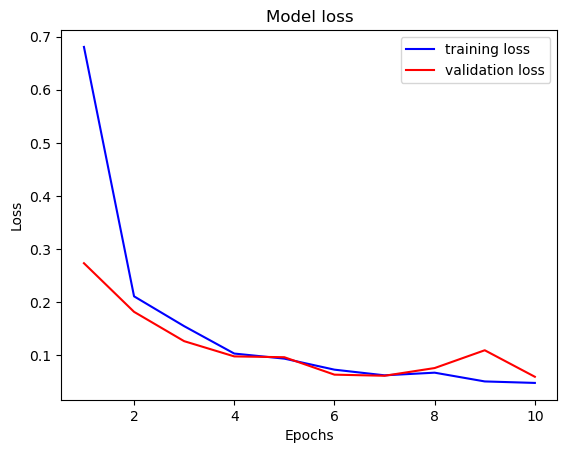

<Figure size 640x480 with 0 Axes>

In [16]:
plt.plot(epoch_range, loss, 'b', label='training loss')
plt.plot(epoch_range, val_loss, 'r', label='validation loss')
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

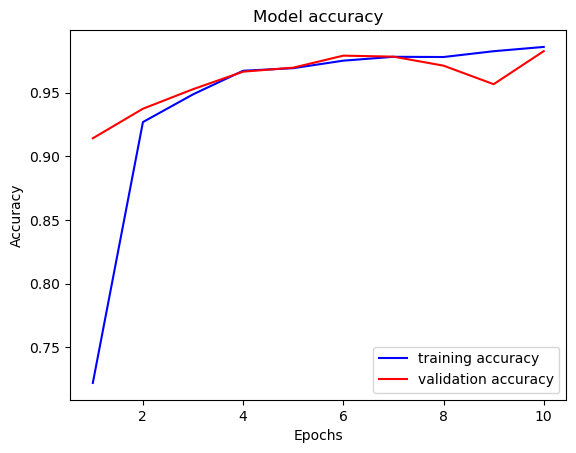

<Figure size 640x480 with 0 Axes>

In [17]:
plt.plot(epoch_range, acc, 'b', label='training accuracy')
plt.plot(epoch_range, val_acc, 'r', label='validation accuracy')
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()

In [5]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model

X_val, y_val, num_class, total_files = [], [], [], []

for i, v in enumerate(categories) : 
    label = [0 for _ in range(len(categories))]
    label[i] = 1
    image_dir = "./output/val/" + v[0] + "_IMG/*.jpg"
    files = glob.glob(image_dir)
    num_class.append(len(files))
    total_files.extend(files)
    for file in files :
        image = Image.open(file)
        image = image.convert("RGB")
        image = image.resize((64, 64))
        data = np.asarray(image)

        X_val.append(data)
        y_val.append(label)
        
X_val = np.array(X_val)
y_val = np.array(y_val)

print(len(X_val))
print(len(y_val))
print(len(num_class))

1179
1179
4


In [6]:
X_val = X_val.astype('float32')
X_val /= 255

In [7]:
model = load_model("./multi_img_classification_cnn.model")
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0

In [8]:
y_pred = model.predict(X_val)
np.set_printoptions(formatter={'float' : lambda x : '{0:0.3f}'.format(x)}) 
print(len(y_pred))

37/37 [==============================] - 3s 59ms/step
1179


In [10]:
corrects = 0
for i in range(len(y_pred)) : 
    if y_pred[i].argmax() == y_val[i].argmax() :
        corrects += 1

print(corrects / len(y_pred))

0.9838846480067854


In [43]:
samples = []

random_num = random.randrange(0, len(y_pred) + 1)

for i in range(0, 10) :
    while random_num in samples : 
        random_num = random.randrange(0, len(y_pred) + 1)
    samples.append(random_num)

print(samples)

[22, 137, 541, 561, 375, 1087, 926, 16, 1092, 475]


In [44]:
for sample in samples : 
    random_img = Image.open(total_files[sample])
    random_img = random_img.convert("RGB")
    random_img = random_img.resize((64, 64))
    raw_data = np.asarray(random_img)
    data = raw_data.reshape(1, 64, 64, 3)
    pred_class = model.predict(data)
    pred_class = pred_class.argmax()

    class_str = categories[pred_class][0]
    print("사진 " + total_files[sample].split("\\")[1] + "는 " + class_str + "로 추정됩니다.")    
    image = Image.fromarray(raw_data)
    image.show()

1/1 [==============================] - 0s 68ms/step
사진 PET_025_221_2.jpg는 PET로 추정됩니다.
1/1 [==============================] - 0s 20ms/step
사진 PET_026_494_2.jpg는 PET로 추정됩니다.
1/1 [==============================] - 0s 83ms/step
사진 PS_041_5461_2.jpg는 PS로 추정됩니다.
1/1 [==============================] - 0s 78ms/step
사진 PS_041_5498_1.jpg는 PS로 추정됩니다.
1/1 [==============================] - 0s 75ms/step
사진 PS_040_7417_0.jpg는 PS로 추정됩니다.
1/1 [==============================] - 0s 68ms/step
사진 PE_096_3747_1.jpg는 PE로 추정됩니다.
1/1 [==============================] - 0s 66ms/step
사진 PE_088_54_1.jpg는 PE로 추정됩니다.
1/1 [==============================] - 0s 73ms/step
사진 PET_025_205_1.jpg는 PET로 추정됩니다.
1/1 [==============================] - 0s 72ms/step
사진 PE_096_3812_0.jpg는 PE로 추정됩니다.
1/1 [==============================] - 0s 70ms/step
사진 PS_041_1332_2.jpg는 PS로 추정됩니다.


In [ ]:
# Neural Network